In [10]:
# !pip install python-louvain

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import community.community_louvain 

Zachary's Karate Club Dataset: An Introduction

Background:
Zachary's Karate Club dataset is one of the most famous and frequently studied examples in social network analysis. It represents the interactions between 34 members of a karate club at a US university during the 1970s. The dataset was collected by sociologist Wayne W. Zachary and has been widely used in network analysis, sociology, and graph theory.

Dataset Description:
The dataset captures the friendships and social connections among the members of the karate club. Each node in the graph represents a member of the karate club, and an edge between two nodes indicates a social connection or friendship between the corresponding members.

Node Attributes:
Each member of the karate club is typically represented by a unique numerical identifier (from 0 to 33 in the standard NetworkX implementation). Node attributes such as gender, age, or role within the club are not part of the basic dataset; it solely provides information about the social connections.

Historical Significance:
This dataset gained prominence due to a significant event that occurred within the club. In the 1970s, a conflict arose between the club's president (node 0) and an instructor (node 33). The conflict eventually led to the club's split into two separate factions, each led by one of the conflicting parties. This real-world event has made the dataset particularly interesting for studying social network dynamics, community detection, and the impact of structural holes in social networks.

Applications and Studies:
Researchers have used Zachary's Karate Club dataset to explore various topics, including community detection algorithms, social network analysis, graph theory, and sociology. The dataset has served as a foundation for understanding social dynamics, network resilience, and the role of influential nodes in a network.

Conclusion:
Zachary's Karate Club dataset continues to be a fundamental resource in the field of network analysis. Its historical context and simplicity make it an excellent starting point for beginners and a benchmark for the evaluation of new algorithms in the realm of social network studies.

In [4]:
# Load the Zachary's Karate Club graph
G = nx.karate_club_graph()
k = 3 

In [12]:
# from scipy.io import savemat

# zac = {'adj': nx.adjacency_matrix(G).todense(),
# 'label': labels}
# savemat("zachary_dataset.mat", zac)

In [59]:
color_list = ['orange', 'green', 'purple', 'yellow', 'black']

# Cliques

Cliques: [[0, 1, 17], [0, 1, 2, 3, 13], [0, 1, 2, 3, 7], [0, 1, 19], [0, 1, 21], [0, 4, 10], [0, 4, 6], [0, 5, 10], [0, 5, 6], [0, 8, 2], [0, 11], [0, 12, 3], [0, 31], [1, 30], [2, 32, 8], [2, 9], [2, 27], [2, 28], [5, 16, 6], [33, 32, 8, 30], [33, 32, 14], [33, 32, 15], [33, 32, 18], [33, 32, 20], [33, 32, 22], [33, 32, 23, 29], [33, 32, 31], [33, 9], [33, 13], [33, 19], [33, 26, 29], [33, 27, 23], [33, 28, 31], [24, 25, 31], [24, 27], [25, 23]]


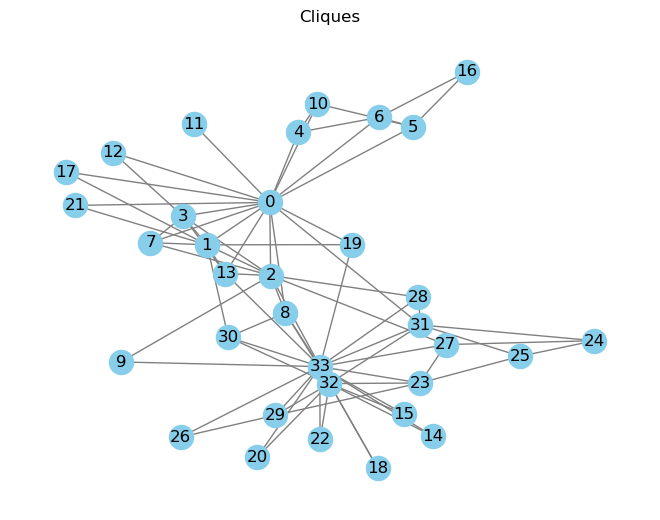

In [5]:
# Cliques
cliques = list(nx.find_cliques(G))
# Output
print("Cliques:", cliques)
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray')
plt.title('Cliques')
plt.show()

In [21]:
from collections import defaultdict

import networkx as nx

__all__ = ["k_clique_communities"]


def k_clique_communities(G, k, cliques=None):
    """Find k-clique communities in graph using the percolation method.

    A k-clique community is the union of all cliques of size k that
    can be reached through adjacent (sharing k-1 nodes) k-cliques.

    Parameters
    ----------
    G : NetworkX graph

    k : int
       Size of smallest clique

    cliques: list or generator
       Precomputed cliques (use networkx.find_cliques(G))

    Returns
    -------
    Yields sets of nodes, one for each k-clique community.

    References
    ----------
    .. [1] Gergely Palla, Imre Derényi, Illés Farkas1, and Tamás Vicsek,
       Uncovering the overlapping community structure of complex networks
       in nature and society Nature 435, 814-818, 2005,
       doi:10.1038/nature03607
    """
    if k < 2:
        raise nx.NetworkXError(f"k={k}, k must be greater than 1.")
    if cliques is None:
        cliques = nx.find_cliques(G)
    cliques = [frozenset(c) for c in cliques if len(c) >= k]

    # First index which nodes are in which cliques
    membership_dict = defaultdict(list)
    for clique in cliques:
        for node in clique:
            membership_dict[node].append(clique)

    # For each clique, see which adjacent cliques percolate
    perc_graph = nx.Graph()
    perc_graph.add_nodes_from(cliques)
    for clique in cliques:
        for adj_clique in _get_adjacent_cliques(clique, membership_dict):
            if len(clique.intersection(adj_clique)) >= (k - 1):
                perc_graph.add_edge(clique, adj_clique)

    # Connected components of clique graph with perc edges
    # are the percolated cliques
    for component in nx.connected_components(perc_graph):
        yield (frozenset.union(*component))


def _get_adjacent_cliques(clique, membership_dict):
    adjacent_cliques = set()
    for n in clique:
        for adj_clique in membership_dict[n]:
            if clique != adj_clique:
                adjacent_cliques.add(adj_clique)
    return adjacent_cliques

# K-clans & K-clubs

In [69]:
import itertools

k_clan_size = k
k_clubs_size = k 

# Find k-Clans
k_clans = []
for subgraph_nodes in itertools.combinations(G.nodes(), k_clan_size):
    subgraph = G.subgraph(subgraph_nodes)
    if nx.is_connected(subgraph):
        k_clans.append(subgraph)

# Print k-Clans and k-Clubs
print("k-Clans:")
for clan in k_clans:
    print(clan.nodes())

# Find k-Clubs
k_clubs = []
for subgraph_nodes in itertools.combinations(G.nodes(), k_clubs_size):
    subgraph = G.subgraph(subgraph_nodes)
    is_k_club = True
    for node in subgraph.nodes():
        if len(set(G.neighbors(node)).intersection(subgraph_nodes)) < k_clubs_size:
            is_k_club = False
            break
    if is_k_club:
        k_clubs.append(subgraph)

print("\nk-Clubs:")
for club in k_clubs:
    print(club.nodes())

k-Clans:
[0, 1, 2]
[0, 1, 3]
[0, 1, 4]
[0, 1, 5]
[0, 1, 6]
[0, 1, 7]
[0, 1, 8]
[0, 1, 10]
[0, 1, 11]
[0, 1, 12]
[0, 1, 13]
[0, 1, 17]
[0, 1, 19]
[0, 1, 21]
[0, 1, 30]
[0, 1, 31]
[0, 2, 3]
[0, 2, 4]
[0, 2, 5]
[0, 2, 6]
[0, 2, 7]
[0, 8, 2]
[0, 9, 2]
[0, 2, 10]
[0, 2, 11]
[0, 2, 12]
[0, 2, 13]
[0, 17, 2]
[0, 2, 19]
[0, 2, 21]
[0, 2, 27]
[0, 2, 28]
[0, 2, 31]
[0, 2, 32]
[0, 3, 4]
[0, 3, 5]
[0, 3, 6]
[0, 3, 7]
[0, 8, 3]
[0, 10, 3]
[0, 11, 3]
[0, 3, 12]
[0, 3, 13]
[0, 17, 3]
[0, 19, 3]
[0, 3, 21]
[0, 3, 31]
[0, 4, 5]
[0, 4, 6]
[0, 4, 7]
[0, 8, 4]
[0, 10, 4]
[0, 11, 4]
[0, 4, 12]
[0, 4, 13]
[0, 17, 4]
[0, 19, 4]
[0, 4, 21]
[0, 4, 31]
[0, 5, 6]
[0, 5, 7]
[0, 8, 5]
[0, 10, 5]
[0, 11, 5]
[0, 12, 5]
[0, 13, 5]
[0, 16, 5]
[0, 17, 5]
[0, 19, 5]
[0, 21, 5]
[0, 5, 31]
[0, 6, 7]
[0, 8, 6]
[0, 10, 6]
[0, 11, 6]
[0, 12, 6]
[0, 13, 6]
[0, 16, 6]
[0, 17, 6]
[0, 19, 6]
[0, 21, 6]
[0, 6, 31]
[0, 8, 7]
[0, 10, 7]
[0, 11, 7]
[0, 12, 7]
[0, 13, 7]
[0, 17, 7]
[0, 19, 7]
[0, 21, 7]
[0, 31, 7]
[0, 8, 10]
[0, 8, 1

### K-clubs returns empty so what does this mean ??

# K-Cliques

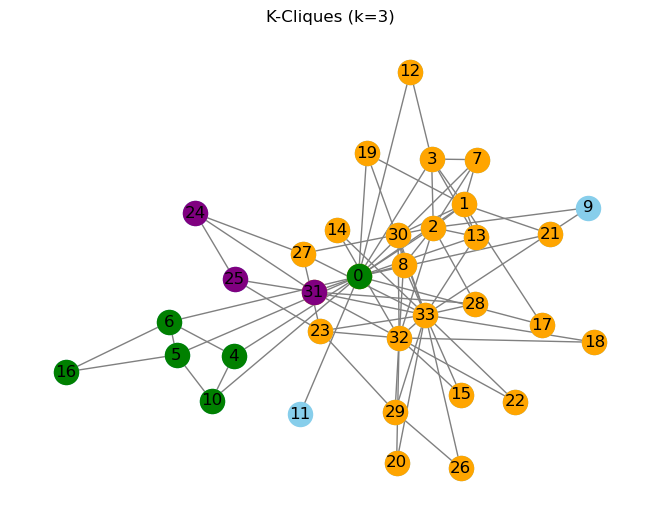

In [73]:
# K-Cliques
 # You can adjust the value of k
k_cliques = list(k_clique_communities(G, k=3))
pos = nx.spring_layout(G)
colors = range(len(k_cliques))
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray')
i=0
for clique in k_cliques:
    nx.draw_networkx_nodes(G, pos, nodelist=[node for node in clique], node_color=color_list[i])
    i+=1
    
plt.title('K-Cliques (k={})'.format(k))
plt.show()

In [23]:
k_cliques

[frozenset({0,
            1,
            2,
            3,
            7,
            8,
            12,
            13,
            14,
            15,
            17,
            18,
            19,
            20,
            21,
            22,
            23,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33}),
 frozenset({0, 4, 5, 6, 10, 16}),
 frozenset({24, 25, 31})]

# K-Plexes

In [37]:
def find_kplex_communities(G, k):
    communities = []
    for node in G.nodes():
        neighbors = set(G.neighbors(node))
        subgraph = G.subgraph(neighbors.union({node}))
        cliques = list(nx.find_cliques(subgraph))
        k_plexes = [clique for clique in cliques if len(clique) >= len(cliques) - k]
        for k_plex in k_plexes:
            if set(k_plex) not in communities:
                communities.append(set(k_plex))
    # Filter communities to have size <= k
    filtered_communities = [community for community in communities if len(community) <= k]
    return filtered_communities

In [40]:

k_plexes = list(find_kplex_communities(G, k))
k_plexes

[{0, 1, 17},
 {0, 1, 19},
 {0, 1, 21},
 {0, 3, 12},
 {0, 4, 10},
 {0, 4, 6},
 {0, 5, 10},
 {0, 5, 6},
 {5, 6, 16},
 {0, 2, 8},
 {2, 8, 32},
 {9, 33},
 {2, 9},
 {0, 11},
 {13, 33},
 {14, 32, 33},
 {15, 32, 33},
 {18, 32, 33},
 {19, 33},
 {20, 32, 33},
 {22, 32, 33},
 {23, 27, 33},
 {23, 25},
 {24, 25, 31},
 {24, 27},
 {26, 29, 33},
 {2, 27},
 {28, 31, 33},
 {2, 28},
 {1, 30},
 {0, 31},
 {31, 32, 33}]

# K-Cores

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 19, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33]


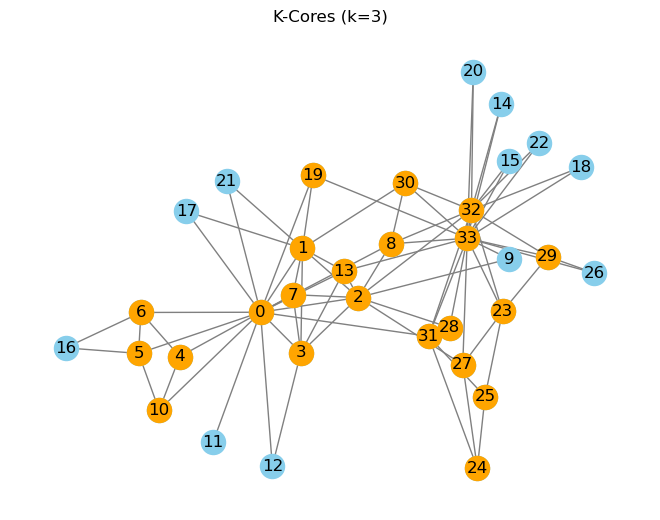

In [43]:

k_cores = list(nx.k_core(G, k=k))
print(list(nx.k_core(G, k=k)))

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray')
nx.draw_networkx_nodes(G, pos, nodelist=k_cores, node_color='orange')
plt.title('K-Cores (k={})'.format(k))
plt.show()

# K-Components

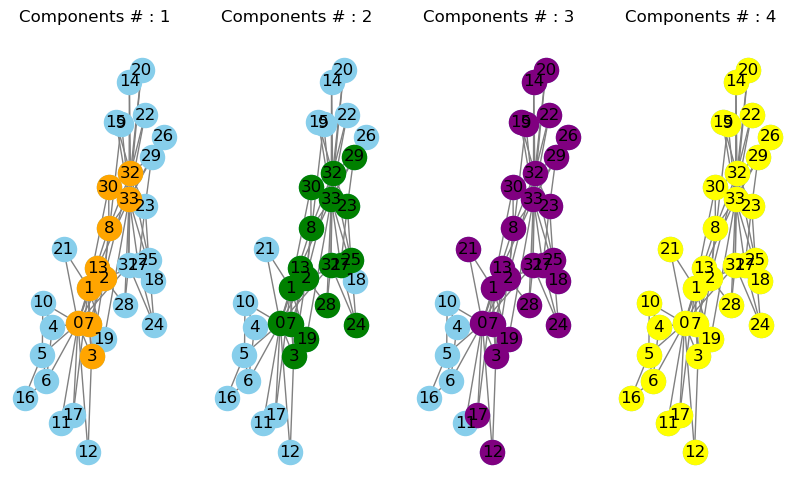

In [62]:

k_components_keys = list(nx.k_components(G).keys())

pos = nx.spring_layout(G)

fig = plt.figure(figsize=(10, 6))

i=1
for component in k_components_keys:
    node_list = list(nx.k_components(G).get(component)[0])

    plt.subplot(1, len(k_components_keys), i)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray')
    nx.draw_networkx_nodes(G, pos, nodelist=[node for node in node_list], node_color=color_list[i-1])

    plt.title('Components # : %d'%i)
    i+=1
plt.show()